In [3]:
!curl -L https://www.dropbox.com/s/qsodvwpcyu3mxei/NYC%20Restaurants.csv?dl=1 -o NYC_Restaurants.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  156M  100  156M    0     0  6163k      0  0:00:26  0:00:26 --:--:-- 8168k


In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

/home/nbuser/anaconda3_410/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_410/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [5]:
rests = pd.read_csv("NYC_Restaurants.csv")

In [6]:
mRests=rests[rests['BORO']=="MANHATTAN"] 

In [7]:
list(mRests.columns.values)

['CAMIS',
 'DBA',
 'BORO',
 'BUILDING',
 'STREET',
 'ZIPCODE',
 'PHONE',
 'CUISINE DESCRIPTION',
 'INSPECTION DATE',
 'ACTION',
 'VIOLATION CODE',
 'VIOLATION DESCRIPTION',
 'CRITICAL FLAG',
 'SCORE',
 'GRADE',
 'GRADE DATE',
 'RECORD DATE',
 'INSPECTION TYPE']

In [8]:
mRests = mRests[mRests['GRADE']!="Not Yet Graded"]

In [9]:
mRests = mRests[pd.notnull(mRests["GRADE"])]

In [10]:
mRests = mRests[pd.notnull(mRests["SCORE"])]

In [11]:
mRests["GRADE"] = mRests["GRADE"].astype("category",categories = ["A","B","C","P","Z"], ordered = True)

In [12]:
mRests = mRests.reset_index(drop=True)
mRests.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,41701548,TWO-BITS RETRO ARCADE,MANHATTAN,153,ESSEX STREET,10002,2124778161,American,04/03/2014,Violations were cited in the following area(s).,06F,Wiping cloths soiled or not stored in sanitizi...,Critical,23.0,B,04/03/2014,07/04/2016,Cycle Inspection / Re-inspection
1,41058228,CHA-AN TEAHOUSE,MANHATTAN,230,EAST 9 STREET,10003,2122288030,Japanese,12/22/2014,Violations were cited in the following area(s).,04H,"Raw, cooked or prepared food is adulterated, c...",Critical,7.0,A,12/22/2014,07/04/2016,Cycle Inspection / Re-inspection
2,40424906,MANNA HOUSE BAKERY,MANHATTAN,87,EAST BROADWAY,10002,2122676200,Bakery,04/27/2015,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,10.0,A,04/27/2015,07/04/2016,Cycle Inspection / Re-inspection
3,41514752,FRANCOIS PAYARD BAKERY,MANHATTAN,116,WEST HOUSTON STREET,10012,2129950888,Bakery,11/12/2013,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,10.0,A,11/12/2013,07/04/2016,Cycle Inspection / Initial Inspection
4,41288500,IL MELOGRANO,MANHATTAN,501,WEST 51 STREET,10019,2127579290,Italian,09/21/2015,Violations were cited in the following area(s).,02G,Cold food item held above 41ÃÂº F (smoked fish ...,Critical,9.0,A,09/21/2015,07/04/2016,Cycle Inspection / Re-inspection


In [13]:
mRests['SCORE'].describe()

count    84381.000000
mean        13.120051
std          8.340741
min         -1.000000
25%          9.000000
50%         11.000000
75%         13.000000
max        131.000000
Name: SCORE, dtype: float64

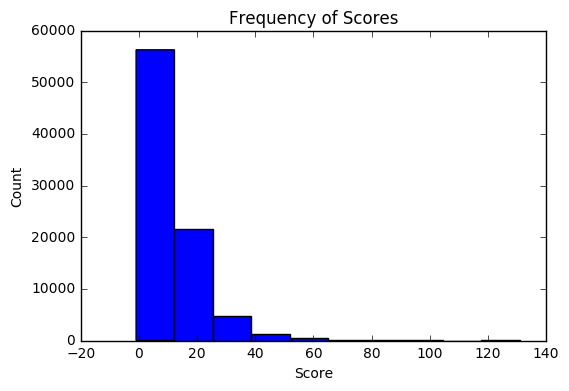

In [14]:
# f, ax = plt.subplots()
data = mRests['SCORE']
plt.hist(data)
plt.xlabel("Score")
plt.ylabel("Count")
plt.title("Frequency of Scores")
plt.show()

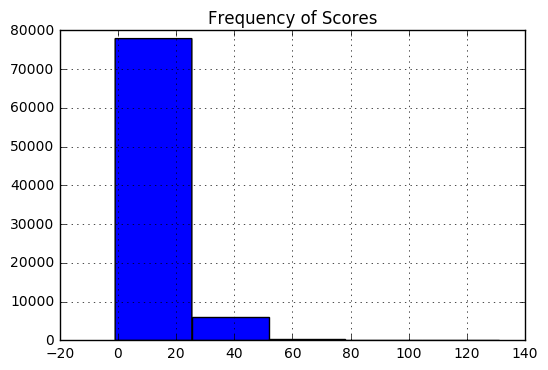

In [15]:
mRests['SCORE'].hist(bins=5)
plt.title("Frequency of Scores")

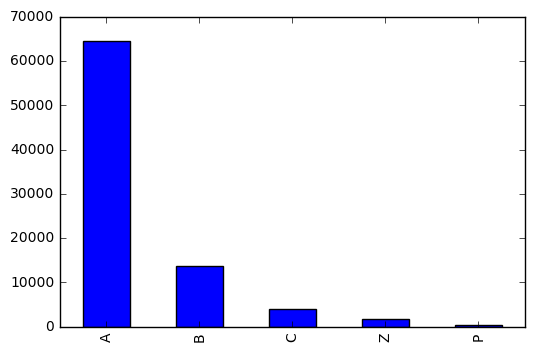

In [16]:
mRests["GRADE"].value_counts().plot(kind = "bar")

In [17]:
!pip install seaborn

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [18]:
import seaborn as sns

In [19]:
sns.set(style="whitegrid", color_codes=True) ### Updates only the seaborn charts created after the fact
plt.style.use('seaborn-colorblind') ### updates for all graphs in the page created after the fact

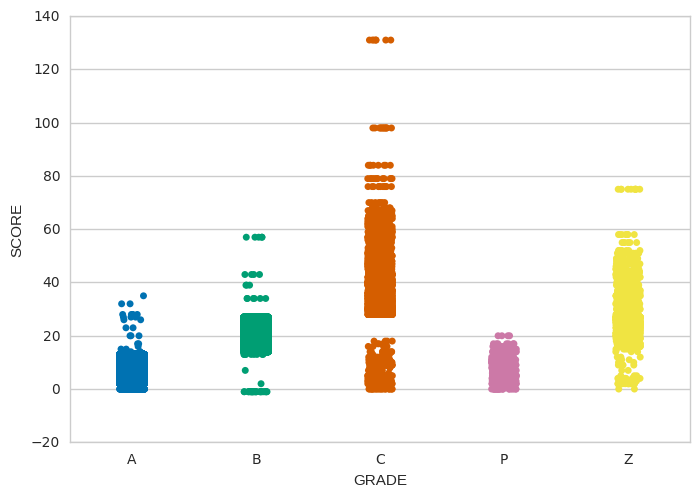

In [20]:
sns.stripplot(x="GRADE", y="SCORE", data = mRests, jitter=True)

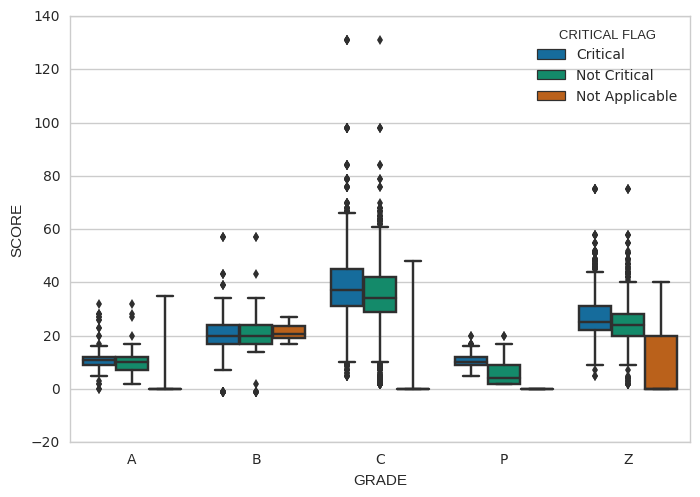

In [21]:
sns.boxplot(x="GRADE", y="SCORE", data = mRests, hue= "CRITICAL FLAG")

In [22]:
!pip install inflect

import inflect
p = inflect.engine()
word_to_number_mapping = {}

for i in range(1, 200):
    word_form = p.number_to_words(i)  # 1 -> 'one'
    ordinal_word = p.ordinal(word_form)  # 'one' -> 'first'
    ordinal_number = p.ordinal(i)  # 1 -> '1st'
    word_to_number_mapping[ordinal_word] = ordinal_number  # 'first': '1st'

import re
for i in range(len(mRests)):

    street= mRests['STREET'][i].split()    

    for j in range(len(street)):
        if street[j].lower() in word_to_number_mapping:

            street[j]=  word_to_number_mapping[street[j].lower()]
            print(street[j])
    for j in range(len(street)):
        if re.findall(r'([0-9]+(st|rd|th|nd)+)', street[j].lower())==[]:
            if street[j].isdigit():
                val=(street[j])
                street[j]=street[j].replace(str(val), str(p.ordinal(val)))    
        streetFull = ' '.join(street)
        mRests.set_value(i,'STREET',streetFull)

mRests["Address"]=mRests['BUILDING'].map(str)+ " " + mRests['STREET'].map(str)+ ", " + mRests['ZIPCODE'].map(str)

    100% |################################| 61kB 199kB/s ta 0:00:01
You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
1st
3rd
3rd
3rd
2nd
1st
3rd
2nd
5th
1st
3rd
1st
3rd
7th
1st
2nd
2nd
8th
1st
3rd
3rd
5th
1st
9th
3rd
2nd
1st
2nd
3rd
1st
3rd
2nd
3rd
2nd
2nd
9th
1st
5th
1st
9th
3rd
1st
1st
2nd
1st
3rd
2nd
5th
2nd
1st
2nd
2nd
2nd
2nd
3rd
3rd
5th
8th
3rd
3rd
3rd
7th
1st
3rd
3rd
1st
3rd
3rd
2nd
5th
1st
2nd
4th
1st
5th
1st
1st
2nd
3rd
3rd
1st
2nd
3rd
3rd
1st
1st
3rd
3rd
1st
1st
3rd
1st
1st
1st
2nd
1st
5th
3rd
4th
2nd
1st
3rd
3rd
9th
1st
1st
1st
3rd
3rd
1st
1st
2nd
3rd
9th
1st
1st
3rd
3rd
1st
2nd
3rd
1st
1st
1st
2nd
2nd
2nd
9th
9th
1st
5th
3rd
1st
3rd
2nd
3rd
1st
2nd
1st
2nd
3rd
1st
3rd
5th
1st
1st
1st
3rd
4th
2nd
1st
3rd
3rd
1st
1st
3rd
3rd
2nd
1st
1st
3rd
1st
2nd
2nd
1st
3rd
1st
4th
3rd
9th
1st
1st
3rd
5th
3rd
9th
1st
2nd
3rd
1st
3rd
1st
3rd
2nd
7th
2nd
2nd
2nd
9th
2nd
1st
8th
1st
1st
2nd
2nd
2nd


In [23]:
mRests["Address"]

0                   153 ESSEX STREET, 10002
1                230 EAST 9th STREET, 10003
2                   87 EAST BROADWAY, 10002
3            116 WEST HOUSTON STREET, 10012
4               501 WEST 51st STREET, 10019
5                     225 LIBERTY ST, 10281
6                       10 MORTON ST, 10014
7                  190 HESTER STREET, 10013
8                520 EAST 6th STREET, 10009
9               326 WEST 40th STREET, 10018
10                  320 PEARL STREET, 10038
11                 800 LEXINGTON AVE, 10065
12              34 UNION SQUARE EAST, 10003
13                   1229 1st AVENUE, 10065
14                   1365 1ST AVENUE, 10021
15           530542 WEST 27th STREET, 10001
16                       1 W 58TH ST, 10019
17                  55 THOMAS STREET, 10013
18                        102 BOWERY, 10013
19               249 COLUMBUS AVENUE, 10023
20                   1316 5th AVENUE, 10026
21               40 EAST 23rd STREET, 10010
22                   455 MAIN ST

In [24]:
import random
np.random.seed(seed=10)
rows = np.random.choice(mRests.index.values, 100)
samp = mRests.ix[rows]
samp= samp.reset_index(drop=True)
samp

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Address
0,41632866,CITY CAFE,MANHATTAN,35,WEST 43rd STREET,10036,2127640444,Delicatessen,01/04/2013,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,12.0,A,01/04/2013,07/04/2016,Cycle Inspection / Re-inspection,"35 WEST 43rd STREET, 10036"
1,50008977,MOKBAR,MANHATTAN,75,9th AVE,10011,6469645963,Korean,05/07/2015,Violations were cited in the following area(s).,06F,Wiping cloths soiled or not stored in sanitizi...,Critical,11.0,A,05/07/2015,07/04/2016,Cycle Inspection / Initial Inspection,"75 9th AVE, 10011"
2,41510644,CURRY HUT,MANHATTAN,534,9th AVENUE,10018,2129675885,Bangladeshi,11/26/2013,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,4.0,A,11/26/2013,07/04/2016,Cycle Inspection / Re-inspection,"534 9th AVENUE, 10018"
3,41706078,AU BON PAIN,MANHATTAN,599,LEXINGTON AVENUE,10022,2123554815,American,05/01/2015,Violations were cited in the following area(s).,06A,Personal cleanliness inadequate. Outer garment...,Critical,13.0,A,05/01/2015,07/04/2016,Cycle Inspection / Initial Inspection,"599 LEXINGTON AVENUE, 10022"
4,41520658,V-NAM CAFE,MANHATTAN,1820,1st AVENUE,10009,2127806020,Vietnamese/Cambodian/Malaysia,12/18/2013,Violations were cited in the following area(s).,10H,Proper sanitization not provided for utensil w...,Not Critical,36.0,C,12/18/2013,07/04/2016,Cycle Inspection / Re-inspection,"1820 1st AVENUE, 10009"
5,50017080,TEN REN'S TEA TIME,MANHATTAN,73,MOTT ST,10013,2123492286,CafÃÂ©/Coffee/Tea,03/05/2015,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,10.0,A,03/05/2015,07/04/2016,Cycle Inspection / Initial Inspection,"73 MOTT ST, 10013"
6,41336336,SOPHIE'S,MANHATTAN,507,EAST 5th STREET,10009,2122285680,American,03/05/2014,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,5.0,A,03/05/2014,07/04/2016,Cycle Inspection / Initial Inspection,"507 EAST 5th STREET, 10009"
7,40392430,IPANEMA BAR,MANHATTAN,252,WEST 14th STREET,10011,2128070150,Spanish,06/15/2016,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,20.0,Z,06/15/2016,07/04/2016,Cycle Inspection / Re-inspection,"252 WEST 14th STREET, 10011"
8,41602657,WAT'S ON YOUR PLATE,MANHATTAN,513,WEST 145th STREET,10031,2122344411,Caribbean,05/16/2015,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,24.0,B,05/16/2015,07/04/2016,Cycle Inspection / Re-inspection,"513 WEST 145th STREET, 10031"
9,41624304,THE HUMMUS & PITA,MANHATTAN,585,AVENUE OF THE AMERICAS,10011,2125107405,Mediterranean,10/09/2014,Violations were cited in the following area(s).,10A,Toilet facility not maintained and provided wi...,Not Critical,11.0,A,10/09/2014,07/04/2016,Cycle Inspection / Re-inspection,"585 AVENUE OF THE AMERICAS, 10011"


In [25]:
!curl -L 'https://www.dropbox.com/s/p4145z5odvlypez/address.csv?dl=1' -o address.csv
adds = pd.read_csv("address.csv")
samp['lat']= adds['latitude']
samp['long']= adds['longitude']

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  2196  100  2196    0     0    667      0  0:00:03  0:00:03 --:--:--  2091


In [26]:
!conda install basemap --yes

Fetching package metadata .........
Solving package specifications: .

Package plan for installation in environment /home/nbcommon/anaconda3_410:

The following NEW packages will be INSTALLED:

    basemap: 1.0.7-np111py35_0
    geos:    3.4.2-0          

The following packages will be UPDATED:

    conda:   4.3.9-py35_0      --> 4.3.14-py35_0

geos-3.4.2-0.t 100% |################################| Time: 0:00:00  25.82 MB/s
conda-4.3.14-p 100% |################################| Time: 0:00:00  54.57 MB/s
basemap-1.0.7- 100% |################################| Time: 0:00:02  54.98 MB/s


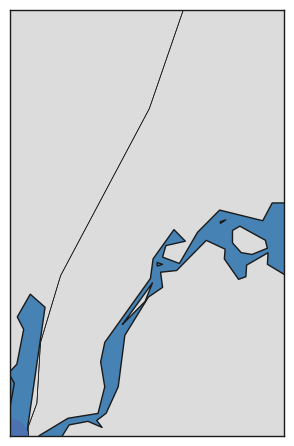

In [27]:
from mpl_toolkits.basemap import Basemap
map = Basemap(projection='merc',
    resolution = 'h', area_thresh = .01,
    lat_0=40.7831, lon_0= -73.9712,
    llcrnrlon=-74.03, llcrnrlat=40.701,
    urcrnrlon=-73.86, urcrnrlat=40.901)

map.drawcoastlines()
map.drawcountries()
map.drawstates()
map.drawrivers()
map.fillcontinents(color = 'gainsboro')
map.drawmapboundary(fill_color='steelblue')

map.plot(samp['lat'],samp['long'],'bo', markersize = 24)


In [28]:
!pip install folium

    100% |################################| 71kB 218kB/s ta 0:00:01
You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [29]:
import folium

mCluster = folium.Map(location=[40.7831, -73.9712], zoom_start =20)
# marker_cluster = folium.MarkerCluster().add_to(mCluster)
for i in range(len(samp)):
    if samp["GRADE"][i] =="A":
        folium.Marker([samp['lat'][i],samp['long'][i]], popup= "Name: " + str(samp['DBA'][i])+ '\n' + "Score: " + str(samp["SCORE"][i]) + '\n'+'Grade: '+ str(samp["GRADE"][i]),
                      icon=folium.Icon(color="green", icon='no-sign')).add_to(mCluster)
    elif samp["GRADE"][i]=="B":
         folium.Marker([samp['lat'][i],samp['long'][i]], popup= "Name: " + str(samp['DBA'][i])+ '\n' + "Score: " + str(samp["SCORE"][i]) + '\n'+'Grade: '+ str(samp["GRADE"][i]),
                      icon=folium.Icon(color='blue',icon='no-sign')).add_to(mCluster)
    else:
         folium.Marker([samp['lat'][i],samp['long'][i]], popup= "Name: " + str(samp['DBA'][i])+ '\n' + "Score: " + str(samp["SCORE"][i]) + '\n'+'Grade: '+ str(samp["GRADE"][i]),
                      icon=folium.Icon(color='red',icon='no-sign')).add_to(mCluster)

In [30]:
mCluster

In [31]:
mCluster.save('restaraunts.html')

In [35]:
!ls

NYC_Restaurants.csv  anaconda2_410  restaraunts.html
address.csv	     anaconda3_410


In [37]:
!curl --upload-file restaraunts.html https://transfer.sh/restaruants.html

https://transfer.sh/x36zr/restaruants.html


In [93]:
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [94]:
from bokeh.charts import Histogram, output_file, show

In [96]:
p1 = Histogram(samp["SCORE"])
show(p1)

In [103]:
p2 = Histogram(mRests,'SCORE', color='GRADE',
              title="Score Grouped by Grade", bins = 15,
              legend='top_left')

show(p2)

In [99]:
from bokeh.models.widgets import Panel, Tabs
from bokeh.io import output_file, show
from bokeh.plotting import figure

tab1 = Panel(child=p1, title="Frequency of Score")
tab2 = Panel(child=p2, title="By Grade")

tabs = Tabs(tabs=[ tab1, tab2 ])
show(tabs)

In [100]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [102]:
x = mRests['GRADE']

tr1 = go.Histogram(x=x, histnorm='probability density', 
                xbins=dict(start=np.min(x), size= 0.25, end= np.max(x)),
                marker=dict(color='rgb(0,0,100)'))
title =" Probability Density of Grades"

layout = dict(
            title=title,
            autosize= True,
            bargap= 0.015,
            height= 600,
            width= 700,       
            hovermode= 'x',
            xaxis=dict(
            autorange= True,
            zeroline= False),
            yaxis= dict(
            autorange= True,
            showticklabels= True,
           ))
fig1 = go.Figure(data=go.Data([tr1]), layout=layout)
iplot(fig1)

In [105]:
samp['text'] = "Name: " + samp['DBA'].astype(str)+ '\n' + "Score: " + samp["SCORE"].astype(str) + '\n'+'Grade: '+ samp["GRADE"].astype(str)

scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
    [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]

data = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = samp['long'],
        lat = samp['lat'],
        text = samp['text'],
        mode = 'markers',
        marker = dict( 
            size = 8, 
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = scl,
            cmin = 0,
            color = samp['SCORE'],
            cmax = samp['SCORE'].max(),
            colorbar=dict(
                title="Restaurant Score"
            )
        ))]

layout = dict(
        title = 'Restaurant Scores',
#         colorbar = True,   
        geo = dict(
            scope='usa',
#             projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5        
        ),
    )

fig = dict( data=data, layout=layout )
iplot(fig)